Project 1: Analysis of DC Metro Crime Data

 Step 1: Dependencies and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
import csv
import calendar
from pprint import pprint
from citipy import citipy
from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

Step 2: Read the .csv files and merge all the .csv files into a single DataFrame 

In [3]:
# Files to Load
#File for 2019
csv_2019_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2019.csv")
#File for 2018
csv_2018_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2018.csv")
#File for 2017
csv_2017_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2017.csv")
#File for 2016
csv_2016_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2016.csv")
#File for 2015
csv_2015_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2015.csv")
#File for 2014
csv_2014_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2014.csv")
#File for 2013
csv_2013_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2013.csv")
#File for 2012
csv_2012_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2012.csv")
#File for 2011
csv_2011_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2011.csv")
#File for 2010
csv_2010_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2010.csv")
#File for 2009
csv_2009_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2009.csv")

In [4]:
#Use glob to match the pattern ‘csv’
#Match the pattern (‘csv’) and save the list of file names in the ‘all_files’ variable.
#extension = 'csv'
#Use pandas to concatenate all files in the list and export as CSV. 
#The output file is named “dc_crimes.csv” located in your working directory.
#combine all files in the list
path = '../Project1_DC_Crime_Analysis/Resources/'
all_files = glob.glob(path + "/*.csv")
all_files
row = []

for filename in all_files:
   df = pd.read_csv(filename, index_col=None, header=0)
   row.append(df)

dc_crimes = pd.concat(row, axis=0, ignore_index=True)

#Convert to DataFrame
dc_crimes_df=pd.DataFrame(dc_crimes)
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.039673,38.903151,8005297,2009-01-12T10:30:00.000Z,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,010700 1,10700.0,Precinct 17,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28T00:00:00.000Z,NaN,356048194,08005297-01
1,-76.999518,38.904689,162302,2009-11-12T18:00:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,010600 2,10600.0,Precinct 83,38.904682,-76.999516,NaN,2009-11-06T12:00:00.000Z,2009-11-12T17:00:00.000Z,356046669,00162302-01


In [5]:
#Save the csv of all merged data
dc_crimes_df.to_csv("../dc_crimes_2009_2019.csv",index=False,header=True,encoding='utf-8-sig')

Step 3: Data Profiling and Data Cleansing

In [6]:
#Counts - Data Profiling
dc_crimes_copy=dc_crimes_df.copy()
dc_crimes_df.count()

X                       374403
Y                       374403
CCN                     374403
REPORT_DAT              374403
SHIFT                   374403
METHOD                  374403
OFFENSE                 374403
BLOCK                   374402
XBLOCK                  374403
YBLOCK                  374403
WARD                    374392
ANC                     374403
DISTRICT                374201
PSA                     374173
NEIGHBORHOOD_CLUSTER    369548
BLOCK_GROUP             373335
CENSUS_TRACT            373335
VOTING_PRECINCT         374339
LATITUDE                374403
LONGITUDE               374403
BID                      62208
START_DATE              374393
END_DATE                352236
OBJECTID                374403
OCTO_RECORD_ID          374403
dtype: int64

In [7]:
#Split the data in START_DATE column to get Date and Time information
dc_crimes_df[['START_DATE','Start_Time']] = dc_crimes_df['START_DATE'].str.split('T',expand=True)
dc_crimes_df[['REPORT_DAT','Report_Time']] = dc_crimes_df['REPORT_DAT'].str.split('T',expand=True)
dc_crimes_df[['END_DATE','End_Time']] = dc_crimes_df['END_DATE'].str.split('T',expand=True)
#Display the data
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,Start_Time,Report_Time,End_Time
0,-77.039673,38.903151,8005297,2009-01-12,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28,NaN,356048194,08005297-01,00:00:00.000Z,10:30:00.000Z,NaN
1,-76.999518,38.904689,162302,2009-11-12,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,38.904682,-76.999516,NaN,2009-11-06,2009-11-12,356046669,00162302-01,12:00:00.000Z,18:00:00.000Z,17:00:00.000Z


In [8]:
#Determine Day of the week and Week number
#Use the to_datetime function of Pandas
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])
dc_crimes_df['DAY_OF_WEEK'] = dc_crimes_df['START_DATE'].dt.day_name()
dc_crimes_df['WEEK_NUMBER'] = dc_crimes_df['START_DATE'].dt.week


#Splitting the Day, Month and Year to new columns
dc_crimes_df['DAY'] = dc_crimes_df ['START_DATE'].dt.day
dc_crimes_df['MONTH'] = dc_crimes_df['START_DATE'].dt.month
dc_crimes_df['YEAR'] = dc_crimes_df['START_DATE'].dt.year

#The above conversions result in float values - Convert them to integers
dc_crimes_df['WEEK_NUMBER']=dc_crimes_df['WEEK_NUMBER'].fillna(0.0).astype(int)
dc_crimes_df['DAY']=dc_crimes_df['DAY'].fillna(0.0).astype(int)
dc_crimes_df['MONTH']=dc_crimes_df['MONTH'].fillna(0.0).astype(int)
dc_crimes_df['YEAR']=dc_crimes_df['YEAR'].fillna(0.0).astype(int)

dc_crimes_df['MONTH'] = dc_crimes_df['MONTH'].apply(lambda x: calendar.month_abbr[x])

#Display the output
dc_crimes_df[["START_DATE","REPORT_DAT","END_DATE","OFFENSE","DAY_OF_WEEK","WEEK_NUMBER","DAY","MONTH","YEAR"]].head()
#dc_crimes_df.Day.dtype

,START_DATE,REPORT_DAT,END_DATE,OFFENSE,DAY_OF_WEEK,WEEK_NUMBER,DAY,MONTH,YEAR
0,2008-12-28,2009-01-12,NaN,BURGLARY,Sunday,52,28,Dec,2008
1,2009-11-06,2009-11-12,2009-11-12,MOTOR VEHICLE THEFT,Friday,45,6,Nov,2009
2,2009-12-06,2009-12-06,2009-12-06,THEFT F/AUTO,Sunday,49,6,Dec,2009
3,2002-01-26,2009-10-20,2002-01-26,THEFT/OTHER,Saturday,4,26,Jan,2002
4,2005-04-30,2009-10-20,2005-04-30,ASSAULT W/DANGEROUS WEAPON,Saturday,17,30,Apr,2005


In [9]:
#Converting data types
dc_crimes_df['REPORT_DAT'] = pd.to_datetime(dc_crimes_df['REPORT_DAT'])
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])


In [10]:
# Drop the unnecessary columns
dc_crimes_df.drop(['XBLOCK', 'YBLOCK','Start_Time','Report_Time','End_Time',
                   'X','Y','ANC','BLOCK_GROUP',
                   'CENSUS_TRACT','VOTING_PRECINCT',
                   'BID','OBJECTID','OCTO_RECORD_ID','BID'],axis=1,inplace=True)
dc_crimes_df.count()

CCN                     374403
REPORT_DAT              374403
SHIFT                   374403
METHOD                  374403
OFFENSE                 374403
BLOCK                   374402
WARD                    374392
DISTRICT                374201
PSA                     374173
NEIGHBORHOOD_CLUSTER    369548
LATITUDE                374403
LONGITUDE               374403
START_DATE              374393
END_DATE                352236
DAY_OF_WEEK             374393
WEEK_NUMBER             374403
DAY                     374403
MONTH                   374403
YEAR                    374403
dtype: int64

In [11]:
#Reorganizing the columns
dc_crimes_df=dc_crimes_df[["CCN","START_DATE","END_DATE","DAY_OF_WEEK","WEEK_NUMBER","DAY","MONTH","YEAR",
                            "LATITUDE","LONGITUDE","BLOCK","NEIGHBORHOOD_CLUSTER",
                            "METHOD","OFFENSE","PSA",
                            "SHIFT","WARD","DISTRICT",
                            "REPORT_DAT"]]

In [12]:
#Find the columns that have null values in them - Find the count of null values in a column
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                 10
END_DATE                22167
DAY_OF_WEEK                10
WEEK_NUMBER                 0
DAY                         0
MONTH                       0
YEAR                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       1
NEIGHBORHOOD_CLUSTER     4855
METHOD                      0
OFFENSE                     0
PSA                       230
SHIFT                       0
WARD                       11
DISTRICT                  202
REPORT_DAT                  0
dtype: int64

In [13]:
#Deleting rows that have null values in them - Retain END_DATE ( to analyze open cases if required)
dc_crimes_df = dc_crimes_df.dropna(axis=0, subset=['START_DATE','NEIGHBORHOOD_CLUSTER','BLOCK',
                                                  'PSA','WARD','DISTRICT'])
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                  0
END_DATE                21879
DAY_OF_WEEK                 0
WEEK_NUMBER                 0
DAY                         0
MONTH                       0
YEAR                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       0
NEIGHBORHOOD_CLUSTER        0
METHOD                      0
OFFENSE                     0
PSA                         0
SHIFT                       0
WARD                        0
DISTRICT                    0
REPORT_DAT                  0
dtype: int64

In [14]:
dc_crimes_df.count()

CCN                     369302
START_DATE              369302
END_DATE                347423
DAY_OF_WEEK             369302
WEEK_NUMBER             369302
DAY                     369302
MONTH                   369302
YEAR                    369302
LATITUDE                369302
LONGITUDE               369302
BLOCK                   369302
NEIGHBORHOOD_CLUSTER    369302
METHOD                  369302
OFFENSE                 369302
PSA                     369302
SHIFT                   369302
WARD                    369302
DISTRICT                369302
REPORT_DAT              369302
dtype: int64

In [15]:
#Any Duplicate incidents?
dc_crimes_df['Dup_CCN'] = dc_crimes_df.groupby('CCN')['CCN'].transform('size')
dc_crimes_df['Dup_CCN']
dc_crimes_df=dc_crimes_df.sort_values("Dup_CCN",ascending=False)
dc_crimes_df['Dup_CCN']

309430    12
309423    12
309429    12
309428    12
309427    12
309426    12
309431    12
309432    12
309422    12
309425    12
309421    12
309424    12
167875     4
167876     4
167877     4
137384     4
31304      3
84189      3
342712     3
84190      3
84191      3
374379     3
342713     3
31303      3
342711     3
374380     3
374381     3
374386     3
374387     3
374388     3
          ..
124873     1
124872     1
124871     1
124870     1
124869     1
124868     1
124867     1
124886     1
124887     1
124888     1
124899     1
124907     1
124906     1
124905     1
124904     1
124903     1
124902     1
124901     1
124900     1
124898     1
124889     1
124897     1
124896     1
124895     1
124894     1
124893     1
124892     1
124891     1
124890     1
187208     1
Name: Dup_CCN, Length: 369302, dtype: int64

In [16]:
#Delete duplicate Incident Data
dc_crimes_df.drop_duplicates(subset ="CCN",keep = False, inplace = True)
dc_crimes_df['Dup_CCN']
dc_crimes_df.count()

CCN                     369103
START_DATE              369103
END_DATE                347242
DAY_OF_WEEK             369103
WEEK_NUMBER             369103
DAY                     369103
MONTH                   369103
YEAR                    369103
LATITUDE                369103
LONGITUDE               369103
BLOCK                   369103
NEIGHBORHOOD_CLUSTER    369103
METHOD                  369103
OFFENSE                 369103
PSA                     369103
SHIFT                   369103
WARD                    369103
DISTRICT                369103
REPORT_DAT              369103
Dup_CCN                 369103
dtype: int64

Outliers :Incidents with a start date before 2009 but were reported after 2009

In [17]:
# There are some incidents that started before 2009 but were reported after 2009
error_data=dc_crimes_df.loc[dc_crimes_df["YEAR"]<2009,:]
error_data[["CCN","REPORT_DAT","START_DATE","END_DATE","OFFENSE","YEAR"]]
error_data_sorted=error_data.sort_values("YEAR")
error_data_sorted[["CCN","REPORT_DAT","START_DATE","END_DATE","OFFENSE","YEAR"]].head(10)

,CCN,REPORT_DAT,START_DATE,END_DATE,OFFENSE,YEAR
96652,14007964,2014-01-17,1800-01-16,2014-01-17,THEFT/OTHER,1800
259657,12118874,2012-08-22,1912-08-22,2012-08-22,THEFT/OTHER,1912
261553,12131446,2012-09-16,1912-09-16,2012-09-16,THEFT/OTHER,1912
119019,14148057,2014-09-27,1914-09-26,2014-09-27,THEFT/OTHER,1914
164351,15402513,2015-12-08,1915-09-17,2015-09-17,THEFT/OTHER,1915
151835,15145586,2015-09-15,1915-08-30,2015-09-14,THEFT/OTHER,1915
136531,15038309,2015-03-19,1915-03-18,2015-03-18,MOTOR VEHICLE THEFT,1915
160140,15168916,2015-10-24,1915-10-17,2015-10-18,THEFT F/AUTO,1915
159005,15172902,2015-10-30,1915-10-16,NaN,THEFT/OTHER,1915
157258,15161356,2015-10-11,1915-10-10,2015-10-11,MOTOR VEHICLE THEFT,1915


Are these start dates in error or were these unsolved crimes recently solved through new technology advancements? 
Is it truly a 100-year-old cold case, or did the person simply enter the wrong century? 

In [18]:
#Deleting these 378 rows
dc_crimes_df.count()
dc_crimes_df.drop(dc_crimes_df[dc_crimes_df.YEAR < 2009].index, inplace=True)
dc_crimes_df.count()

CCN                     368725
START_DATE              368725
END_DATE                346876
DAY_OF_WEEK             368725
WEEK_NUMBER             368725
DAY                     368725
MONTH                   368725
YEAR                    368725
LATITUDE                368725
LONGITUDE               368725
BLOCK                   368725
NEIGHBORHOOD_CLUSTER    368725
METHOD                  368725
OFFENSE                 368725
PSA                     368725
SHIFT                   368725
WARD                    368725
DISTRICT                368725
REPORT_DAT              368725
Dup_CCN                 368725
dtype: int64

# Analysis

# Analyzing the Crime Rate

In [19]:
#Total Crimes
t_crimes=len(dc_crimes_df["CCN"].unique())
t_crimes

crime_rate = dc_crimes_df.groupby('OFFENSE')
crime_rate.count().head()
c_crime_rate=crime_rate.CCN.count()
print("Total number of Crimes for each category of offense\n")
print(c_crime_rate)
print("\n")
print("Percentage of Crimes for each category of offense\n")
p_crime_rate=(crime_rate.CCN.count()/t_crimes)*100
print(p_crime_rate)
t_crimes

Total number of Crimes for each category of offense

OFFENSE
ARSON                            273
ASSAULT W/DANGEROUS WEAPON     23409
BURGLARY                       29863
HOMICIDE                        1243
MOTOR VEHICLE THEFT            31789
ROBBERY                        34671
SEX ABUSE                       2595
THEFT F/AUTO                  105710
THEFT/OTHER                   139172
Name: CCN, dtype: int64


Percentage of Crimes for each category of offense

OFFENSE
ARSON                          0.074039
ASSAULT W/DANGEROUS WEAPON     6.348634
BURGLARY                       8.098990
HOMICIDE                       0.337108
MOTOR VEHICLE THEFT            8.621330
ROBBERY                        9.402943
SEX ABUSE                      0.703777
THEFT F/AUTO                  28.669062
THEFT/OTHER                   37.744118
Name: CCN, dtype: float64


368725

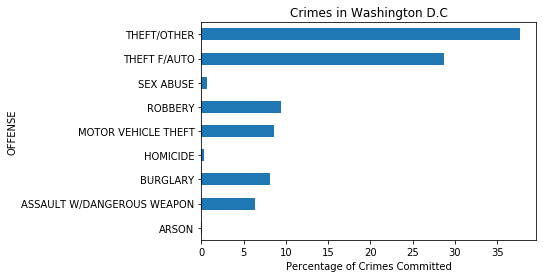

In [20]:
#Offense Plot - Bar Graph
crime_rate_df=pd.DataFrame(p_crime_rate)
crime_rate_df
fig = crime_rate_df["CCN"].plot(kind="barh") 
plt.xlabel('Percentage of Crimes Committed')
plt.title("Crimes in Washington D.C")
plt.show()

In [67]:
year_count = dc_crimes_df.groupby(['YEAR'])['CCN'].count()
year_count
month_count = dc_crimes_df.groupby(['MONTH'])['CCN'].count()
month_count = month_count.reindex(index=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
    
day_count = dc_crimes_df.groupby(['DAY_OF_WEEK'])['CCN'].count()
day_count = day_count.reindex(index=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
day_count
district_count = dc_crimes_df.groupby(['DISTRICT'])['CCN'].count()
district_count

DISTRICT
1.0    52623
2.0    66720
3.0    68214
4.0    47684
5.0    48430
6.0    49131
7.0    35923
Name: CCN, dtype: int64

In [68]:
# Function to plot graphs
def make_plot(var, xlabel, ylabel, title):
    sns.set(style="darkgrid")
    norm = plt.Normalize(0, var.values.max())
    colors = plt.cm.Reds(norm(var.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(var.index, var.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.title(title)
    # save plot to an image
    #plt.savefig(images_path + image_name)
    plt.show()

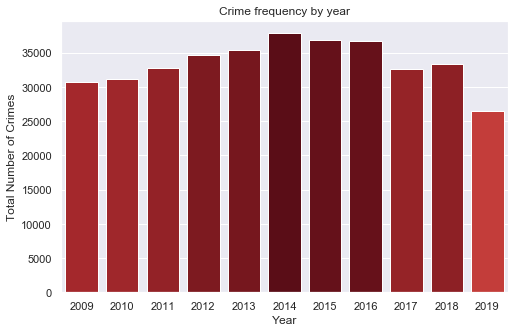

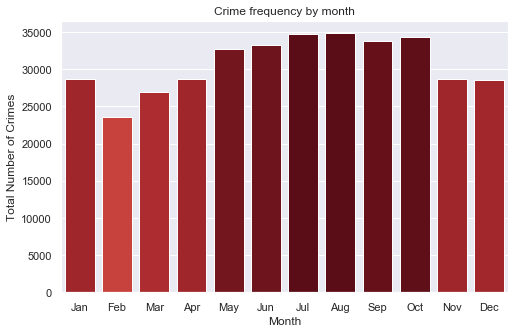

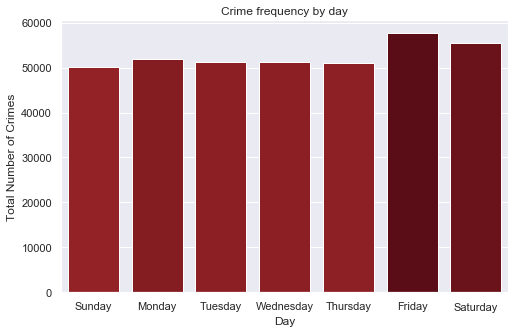

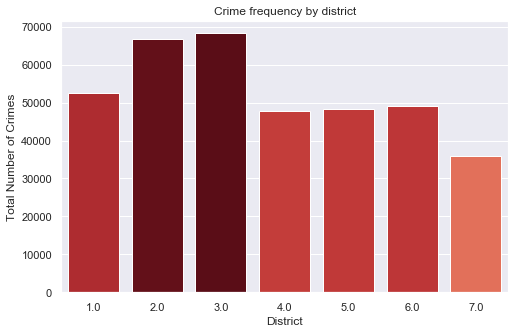

In [69]:
#Plotting graphs
make_plot(year_count, 'Year', 'Total Number of Crimes','Crime frequency by year')
make_plot(month_count, 'Month', 'Total Number of Crimes','Crime frequency by month')
make_plot(day_count, 'Day', 'Total Number of Crimes','Crime frequency by day')
make_plot(district_count, 'District', 'Total Number of Crimes','Crime frequency by district')

In [46]:
#Total Crimes
t_crimes=len(dc_crimes_df["CCN"].unique())
t_crimes

s_crime_rate = dc_crimes_df.groupby('SHIFT')
s_crime_rate.count().head()
s_crime_rate=s_crime_rate.CCN.count()
s_crime_rate
#print("Total number of Crimes for each category of offense\n")
#print(s_crime_rate)
# print("\n")
# print("Percentage of Crimes for each category of offense\n")
# p_crime_rate=(crime_rate.CCN.count()/t_crimes)*100
# print(p_crime_rate)

SHIFT
DAY         139868
EVENING     157274
MIDNIGHT     71583
Name: CCN, dtype: int64

In [ ]:
#Time to report a crime
#dc_crimes_df['TIME_TO_REPORT'] = (dc_crimes_df['REPORT_DAT'] - dc_crimes_df['END_DATE'])

In [ ]:
# #Group crimes by WARD and Offense
# w_crime_df= dc_crimes_df.groupby('WARD')['OFFENSE'].value_counts()
# w_crime_df

In [ ]:
# #Group crimes by neighbourhood cluster and offense
# n_crime_df = dc_crimes_df.groupby('NEIGHBORHOOD_CLUSTER')['OFFENSE'].value_counts()
# n_crime_df

# Analyzing the trend for different types of Offenses over the years

In [ ]:
#THEFT/OTHER                   141605
#THEFT F/AUTO                  106850
#ROBBERY                        35171
#MOTOR VEHICLE THEFT            32388
#BURGLARY                       30229
#ASSAULT W/DANGEROUS WEAPON     23757
#SEX ABUSE                       2750
#HOMICIDE                        1374
#ARSON                            279
#dc_crimes_df.columns

In [54]:
# gather yearly count of "Theft from Vehicle" crime 
theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="THEFT/OTHER"]
theft_yearly= theft["YEAR"].value_counts(sort=False)
theft_index = theft_yearly.index.tolist()
theft_index

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

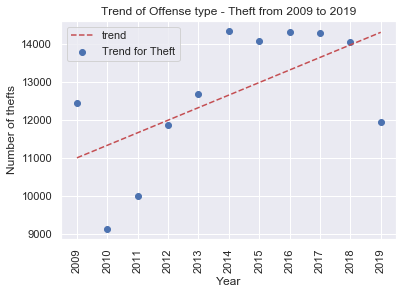

In [55]:
# plot the "Theft from Vehicle" trend from 2009 to 2019 
# plotting the line 2 points  
import matplotlib.pylab as pylab
plt.scatter(theft_index, theft_yearly, label = "Trend for Theft") 

# calc the trendline
trendline = np.polyfit(theft_index, theft_yearly, 1)
p = np.poly1d(trendline)
pylab.plot(theft_index,p(theft_index),"r--", label="trend")

# configuration
plt.xlabel('Year')
plt.ylabel('Number of thefts')
plt.title('Trend of Offense type - Theft from 2009 to 2019') 
plt.legend()
plt.xticks(theft_index, rotation='vertical')
plt.show()

In [ ]:
copy_df=dc_crimes_df.copy()
copy_df[['BLOCK','Street_Name']] = dc_crimes_df['BLOCK'].str.split('BLOCK OF ',expand=True)
copy_df[['BLOCK','Street_Name']].head(2)
#copy_df.loc[copy_df["Street_Name"]=="None",:]

In [ ]:
copy_df["Street_Name"].value_counts()[:5].plot.bar(title='Top 10 Dangerous Blocks')

In [ ]:
plt.scatter(dc_crimes_df['LONGITUDE'], dc_crimes_df['LATITUDE'], s=0.5, alpha=0.3, color="brown", lw=0)

In [ ]:
#fig = crime_rate_df["CCN"].plot(kind="bar", figsize = (20,10), rot=75) 

#fig.set_title("Frequency of Crimes by Category", fontsize=15, weight = "bold")
#fig.set_ylabel("Percentage of Crimes", fontsize=12)
#plt.savefig('../plot/04.perc_crime_category_2016.png')
#plt.show()

In [ ]:
#Export the city data into a .csv. -"Should be the final step"
#dc_crimes_df.to_csv("../dc_crimes.csv",index=False,header=True,encoding='utf-8-sig')
#encoding also exports any non-english data

In [ ]:
dc_crimes_df

In [ ]:
# Percent Changes
v_offense=dc_crimes_df["OFFENSE"].unique()
data_2018=dc_crimes_df.loc[dc_crimes_df["YEAR"]==2018]
data_2018_burglary["OFFENSE"].unique()


In [ ]:
# #Crime Count for every year
# crime_2019 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2019]
# crime_2019 = crime_2019.groupby("OFFENSE").count().reset_index()
crime_2019 = crime_2019[["OFFENSE","CCN"]

# crime_2018 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2018]
# crime_2018 = crime_2018.groupby("OFFENSE").count().reset_index()
# crime_2018 = crime_2018["CCN"]

# crime_2017 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2017]
# crime_2017 = crime_2017.groupby("OFFENSE").count().reset_index()
# crime_2017 = crime_2017["CCN"]

# crime_2016 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2016]
# crime_2016 = crime_2016.groupby("OFFENSE").count().reset_index()
# crime_2016 = crime_2016["CCN"]

# crime_2015 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2015]
# crime_2015 = crime_2015.groupby("OFFENSE").count().reset_index()
# crime_2015 = crime_2015["CCN"]

# crime_2014 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2014]
# crime_2014 = crime_2014.groupby("OFFENSE").count().reset_index()
# crime_2014 = crime_2014["CCN"]

# crime_2013 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2013]
# crime_2013 = crime_2013.groupby("OFFENSE").count().reset_index()
# crime_2013 = crime_2013["CCN"]

# crime_2012 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2012]
# crime_2012 = crime_2012.groupby("OFFENSE").count().reset_index()
# crime_2012 = crime_2012["CCN"]

# crime_2011 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2011]
# crime_2011 = crime_2011.groupby("OFFENSE").count().reset_index()
# crime_2011 = crime_2011["CCN"]

# crime_2010 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2010]
# crime_2010 = crime_2010.groupby("OFFENSE").count().reset_index()
# crime_2010 = crime_2010["CCN"]

# crime_2009 = dc_crimes_df.loc[dc_crimes_df["YEAR"]==2009]
# crime_2009 = crime_2009.groupby("OFFENSE").count().reset_index()
# crime_2009 = crime_2009["CCN"]

# off=dc_crimes_df["OFFENSE"].unique()

# yearly_count_df=pd.DataFrame({"OFFENSES":off,
#                              "2009":crime_2009,
#                              "2010":crime_2010,
#                              "2011":crime_2011,
#                              "2012":crime_2012,
#                              "2013":crime_2013,
#                              "2014":crime_2014,
#                              "2015":crime_2015,
#                              "2016":crime_2016,
#                              "2017":crime_2017,
#                              "2018":crime_2018,
#                              "2019":crime_2019})
# yearly_count_df

# #crime_2010 = crime_2010.rename(columns={"crm_cd_1": "2010 Crime count"})